<a href="https://colab.research.google.com/github/AnarHuseynov00/Apple-stock-price-prediction-using-LSTM/blob/master/Project1(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
StockDataAAPL = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-01-01')

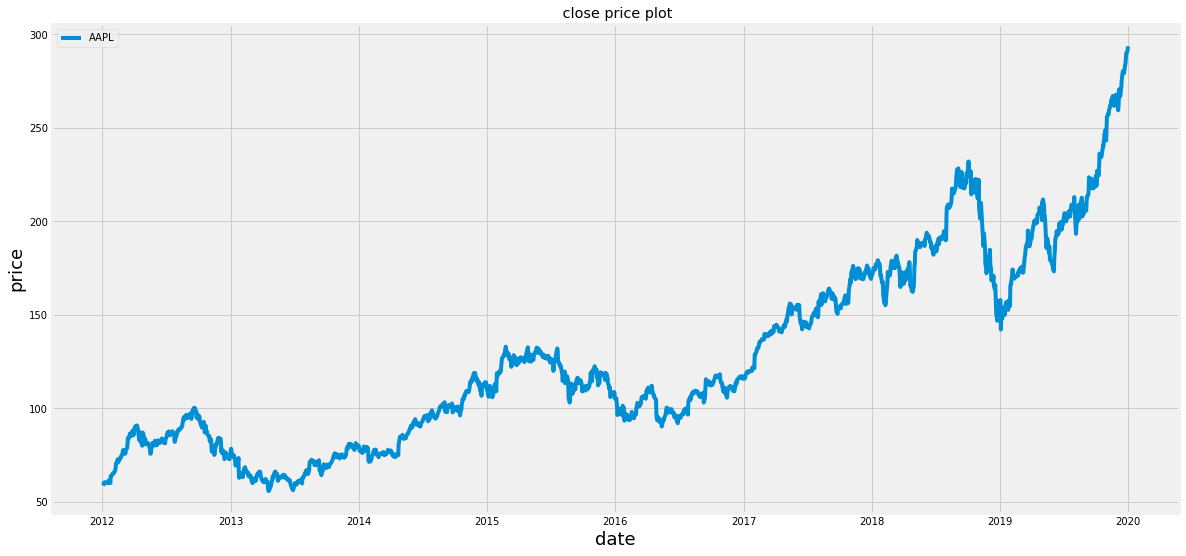

In [3]:
plt.figure(figsize=(18,9))
plt.title(' close price plot')
plt.plot(StockDataAAPL['Close'])
plt.xlabel('date', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.legend(['AAPL'])
plt.show()

In [0]:
A = StockDataAAPL.filter(['Close'])
AAPLclose = A.values
trainL = math.ceil(len(AAPLclose) * 0.8)

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaledAAPLclose = scaler.fit_transform(AAPLclose)

In [0]:
trainingData = scaledAAPLclose[0:trainL,:]
x_train = []
y_train = []
for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i, 0])
  y_train.append(trainingData[i, 0])

In [0]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (np.shape(x_train)[0], np.shape(x_train)[1], 1))

In [0]:
model = Sequential()
model.add(LSTM(40, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(20))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1550/1550 [==============================] - 54s 35ms/step - loss: 6.6609e-04
Epoch 2/2
1550/1550 [==============================] - 56s 36ms/step - loss: 3.2260e-04


In [0]:
scaledTestData = scaledAAPLclose[trainL-60:, :]

In [0]:
y_test = AAPLclose[trainL:, :]
x_test = []
for i in range(60, len(scaledTestData)):
  x_test.append(scaledTestData[i-60:i , :])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.481608934056766

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


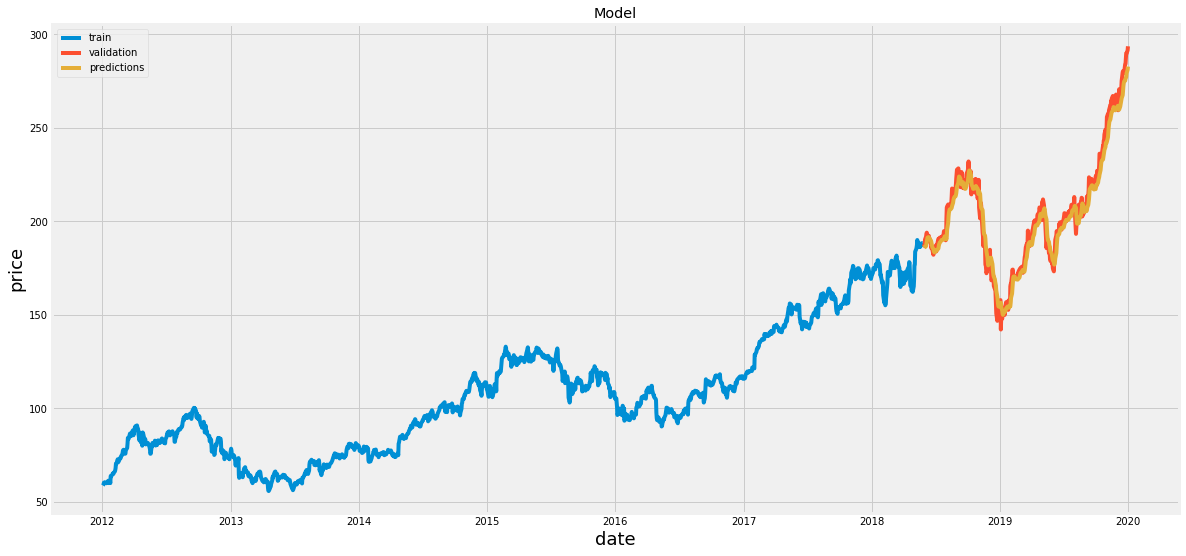

In [38]:
train = A[:trainL]
valid = A[trainL:]
valid['Predictions'] = predictions
plt.figure(figsize=(18,9))
plt.title('Model')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('date', fontsize = 18)
plt.ylabel('price', fontsize = 18)
plt.legend(['train', 'validation', 'predictions'])
plt.show()